In [1]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import random

import numpy as np

import matplotlib.cm as cm

import pickle

from denoising_assessment_project.utils import metric_compute, stats_compute, stats_plot

# parameters setup 
from denoising_assessment_project.global_vars import global_vars

%matplotlib notebook

In [2]:
# restoring variables from memory (GT images, indices)
%store -r

In [3]:
# opening GT images and noised images
with open('/Users/miriamczech/Desktop/denoising_assessment/pickled_data/EVAL/un_noised_images_eval_27_06.pkl', 'rb') as un_noised_images_eval_27_06_pickled:
    un_noised_images = pickle.load(un_noised_images_eval_27_06_pickled)
with open('/Users/miriamczech/Desktop/denoising_assessment/pickled_data/EVAL/noised_images_eval_27_06.pkl', 'rb') as noised_images_eval_27_06_pickled:
    noised_images = pickle.load(noised_images_eval_27_06_pickled)

In [26]:
# to be deleted
# 2nd 2D plot:

# -> noise, purple one 
print('noise, purple one: ', values[1,19])
# -> noise, red one 
print('noise, red one: ', values[18,19])

print('')

# -> CARE, purple one 
print('CARE, purple one: ', values_CARE[1,19])
# -> CARE, red one 
print('CARE, red one: ', values_CARE[18,19])

noise, purple one:  tensor(0.1412)
noise, red one:  tensor(0.0402)

CARE, purple one:  tensor(0.0429)
CARE, red one:  tensor(0.0112)


<IPython.core.display.Javascript object>


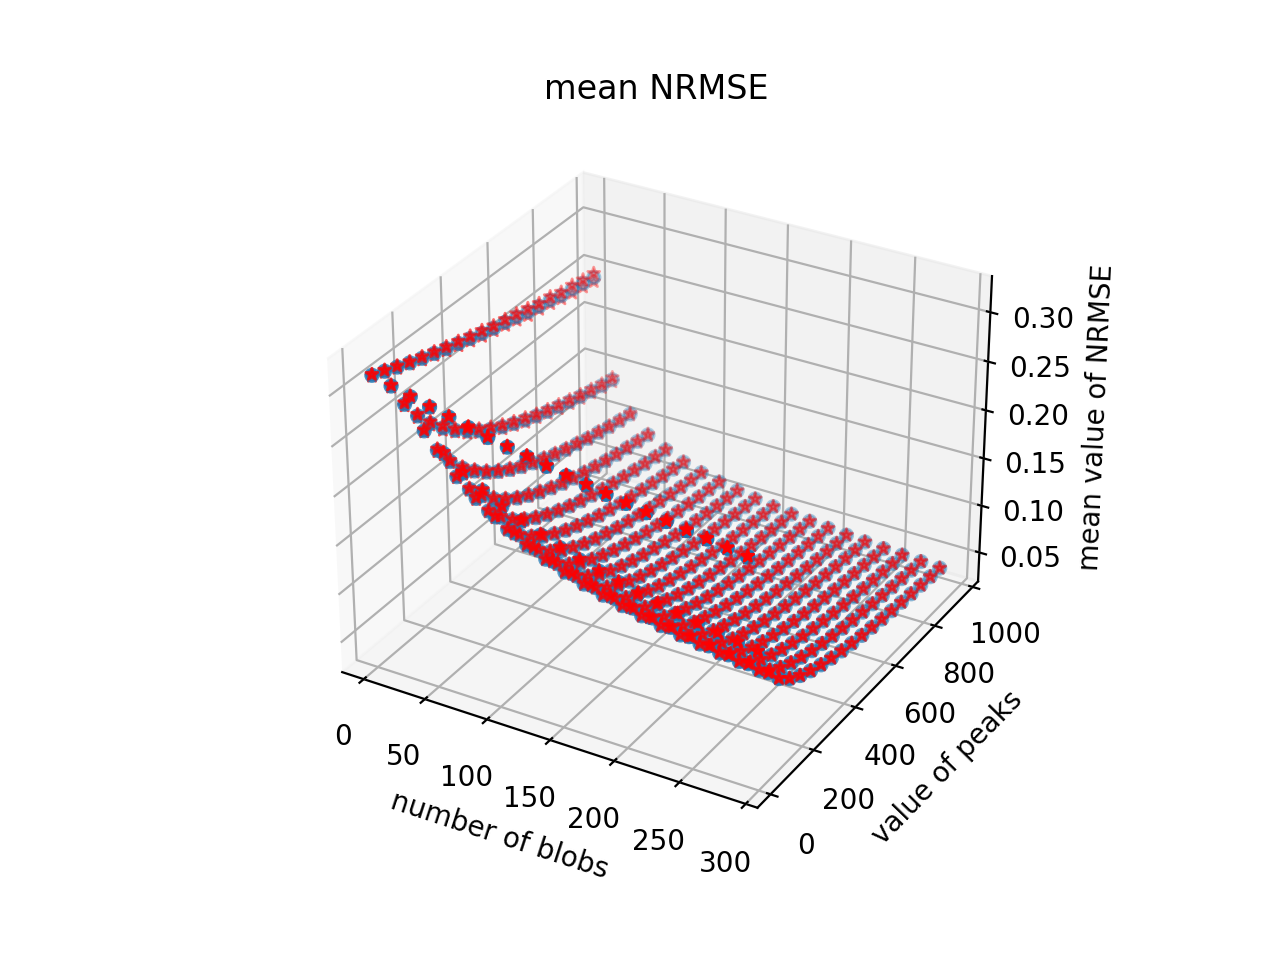

<IPython.core.display.Javascript object>


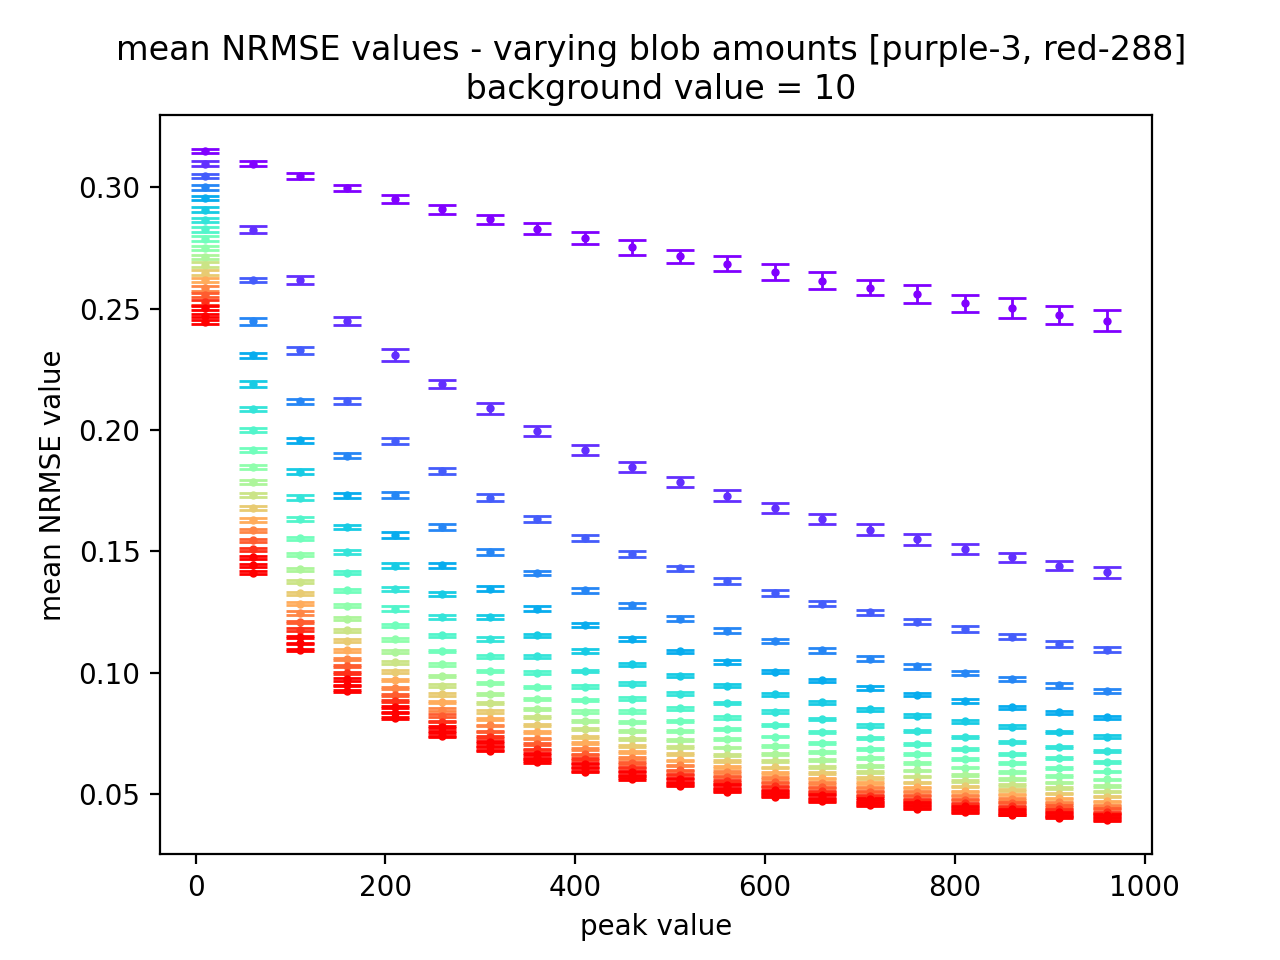

<IPython.core.display.Javascript object>


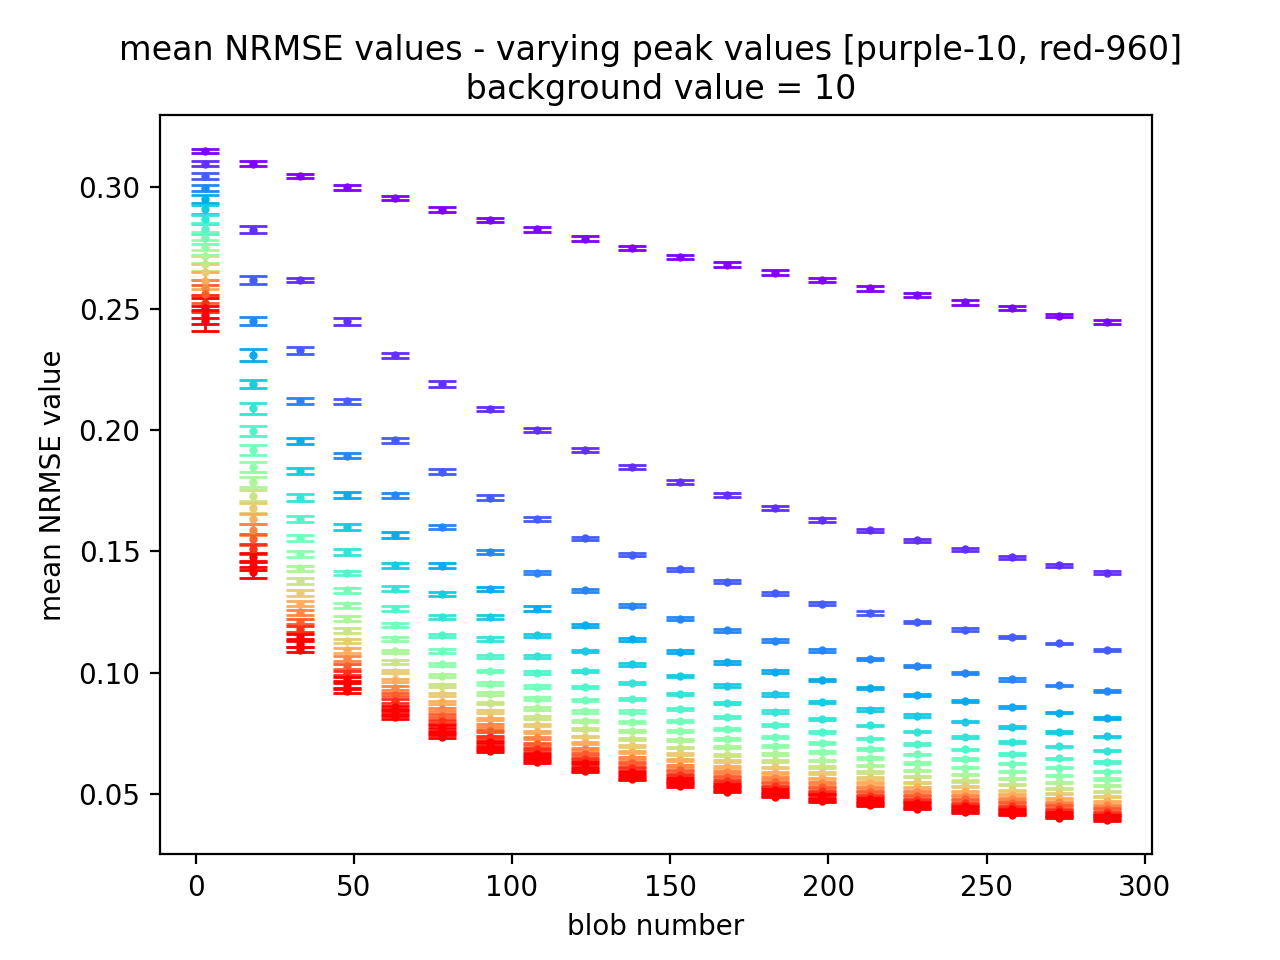

In [4]:
# -NRMSE-
# 4a. Computing NRMSE for each GT-NOISE image pair in the data collection
# dims=[m, n, reps]
metric_output = metric_compute.NRMSE_compute(un_noised_images, noised_images)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_NRMSE = stats_compute.set_mean_std_compute(metric_output)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


<IPython.core.display.Javascript object>


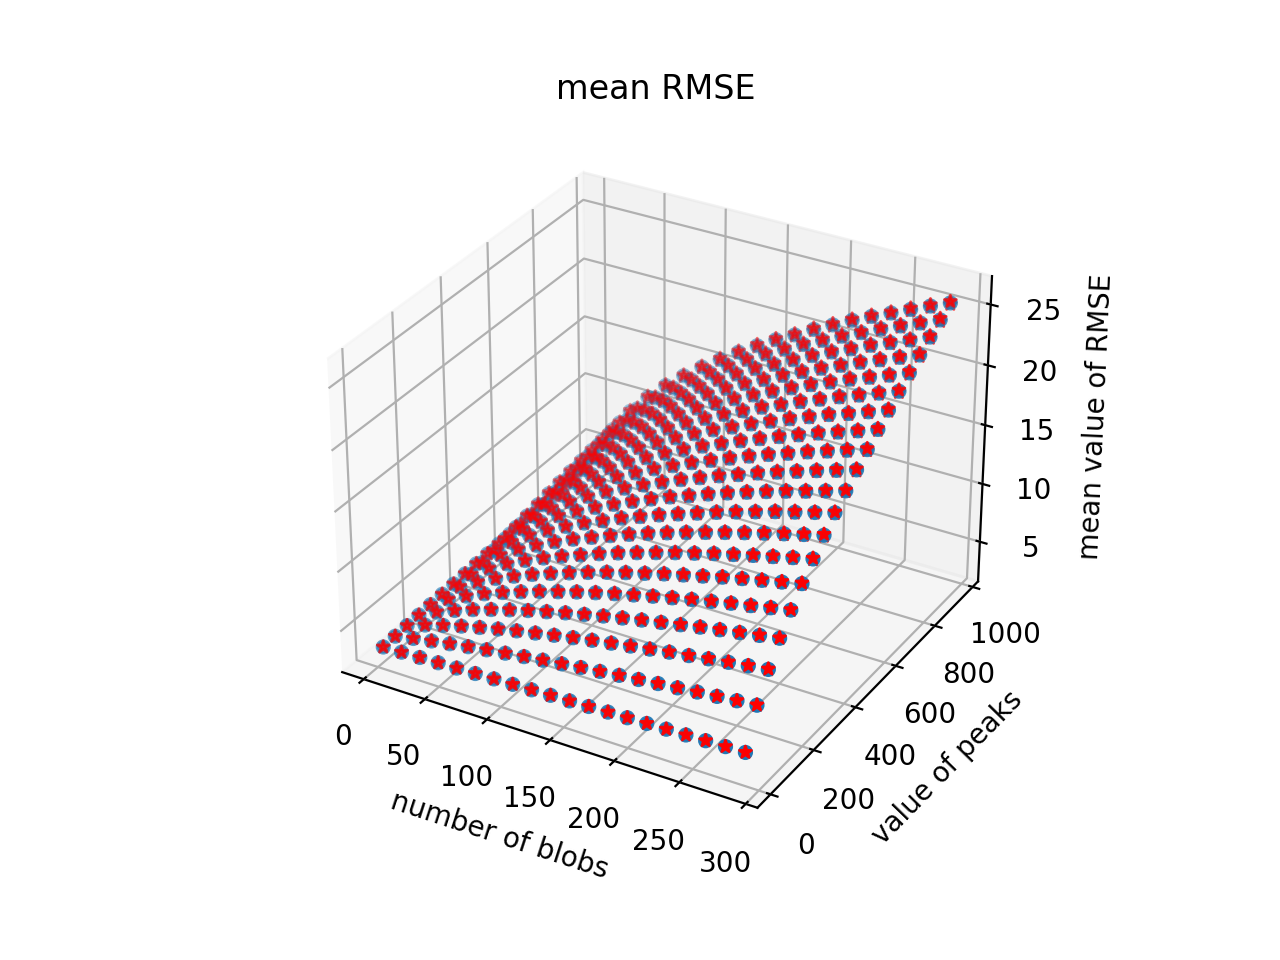

<IPython.core.display.Javascript object>


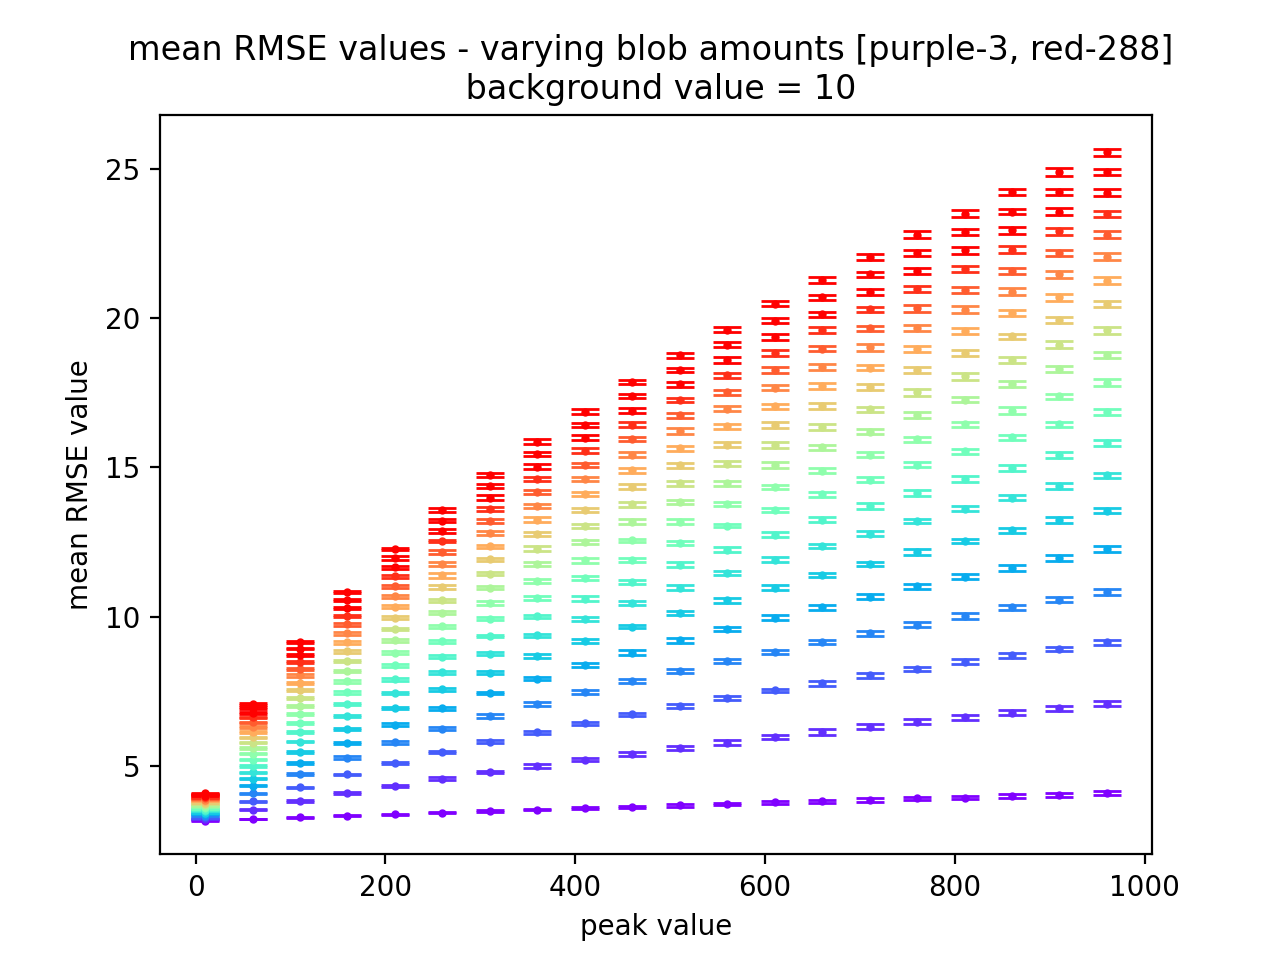

<IPython.core.display.Javascript object>


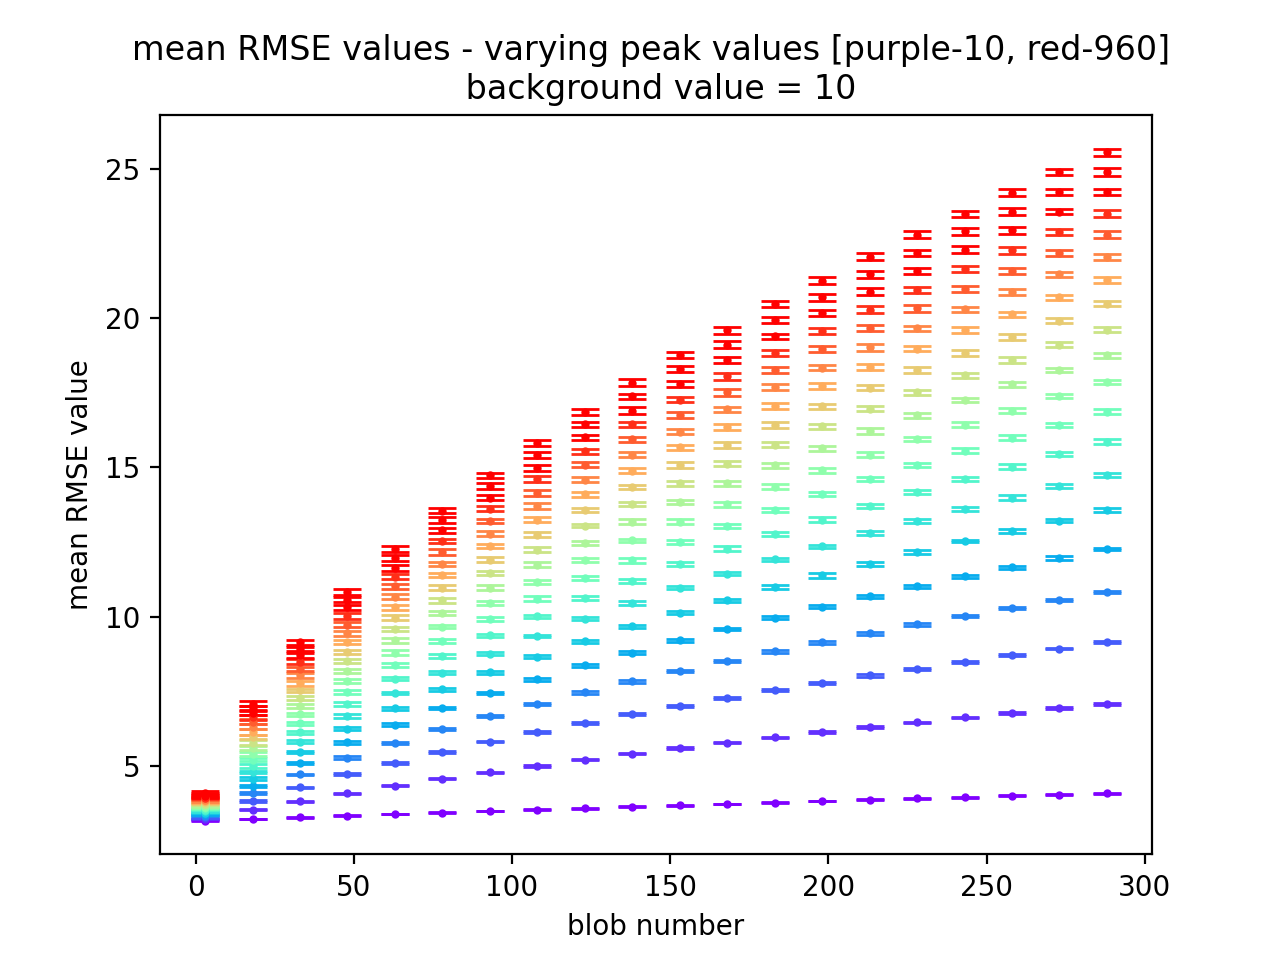

In [6]:
# -RMSE-
# 4b. Computing RMSE for each image in the data collection
# dims=[m, n, reps]
metric_output = metric_compute.RMSE_compute(un_noised_images, noised_images)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_RMSE = stats_compute.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


<IPython.core.display.Javascript object>


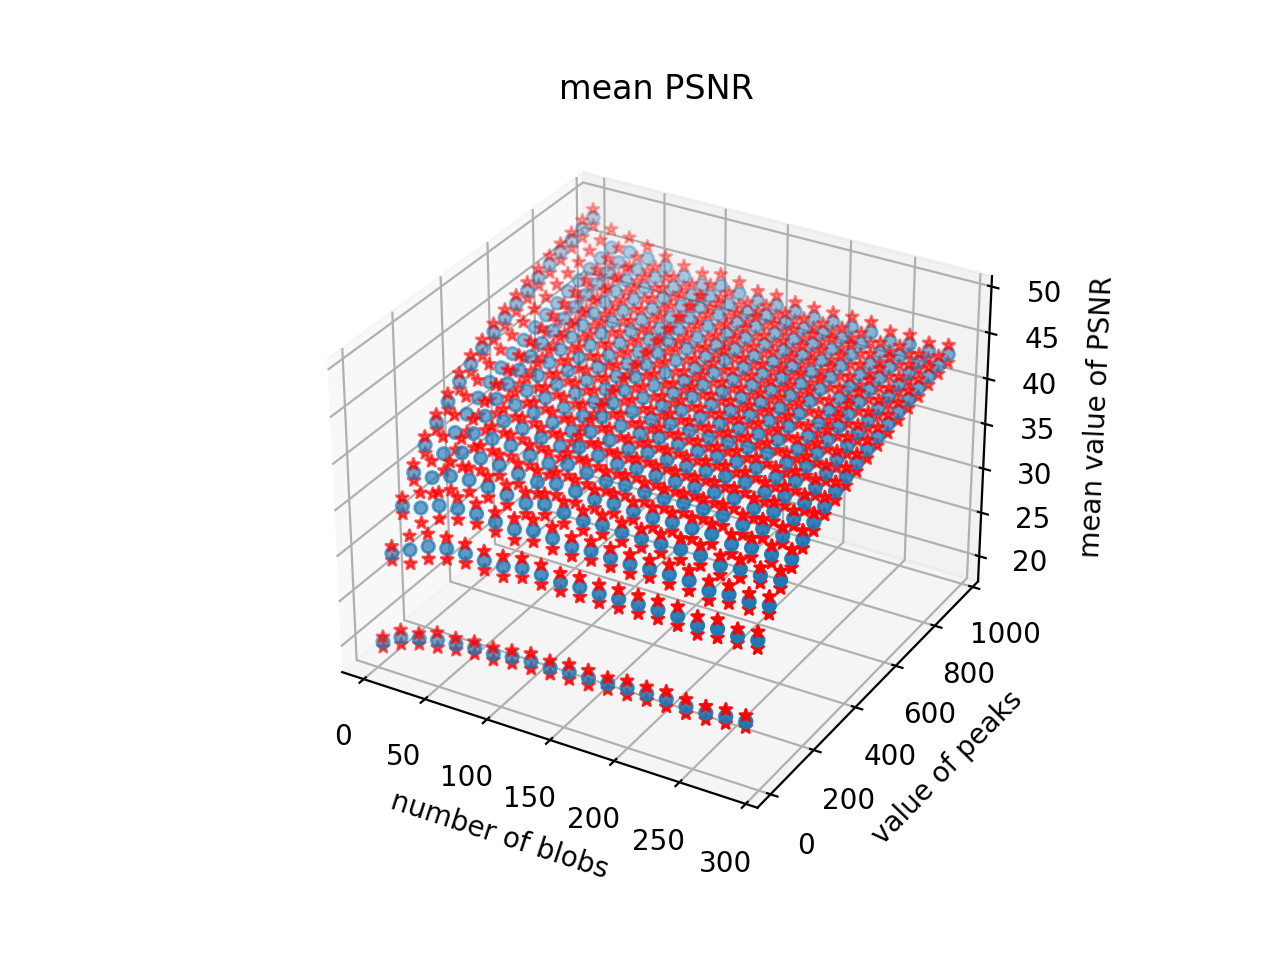

<IPython.core.display.Javascript object>


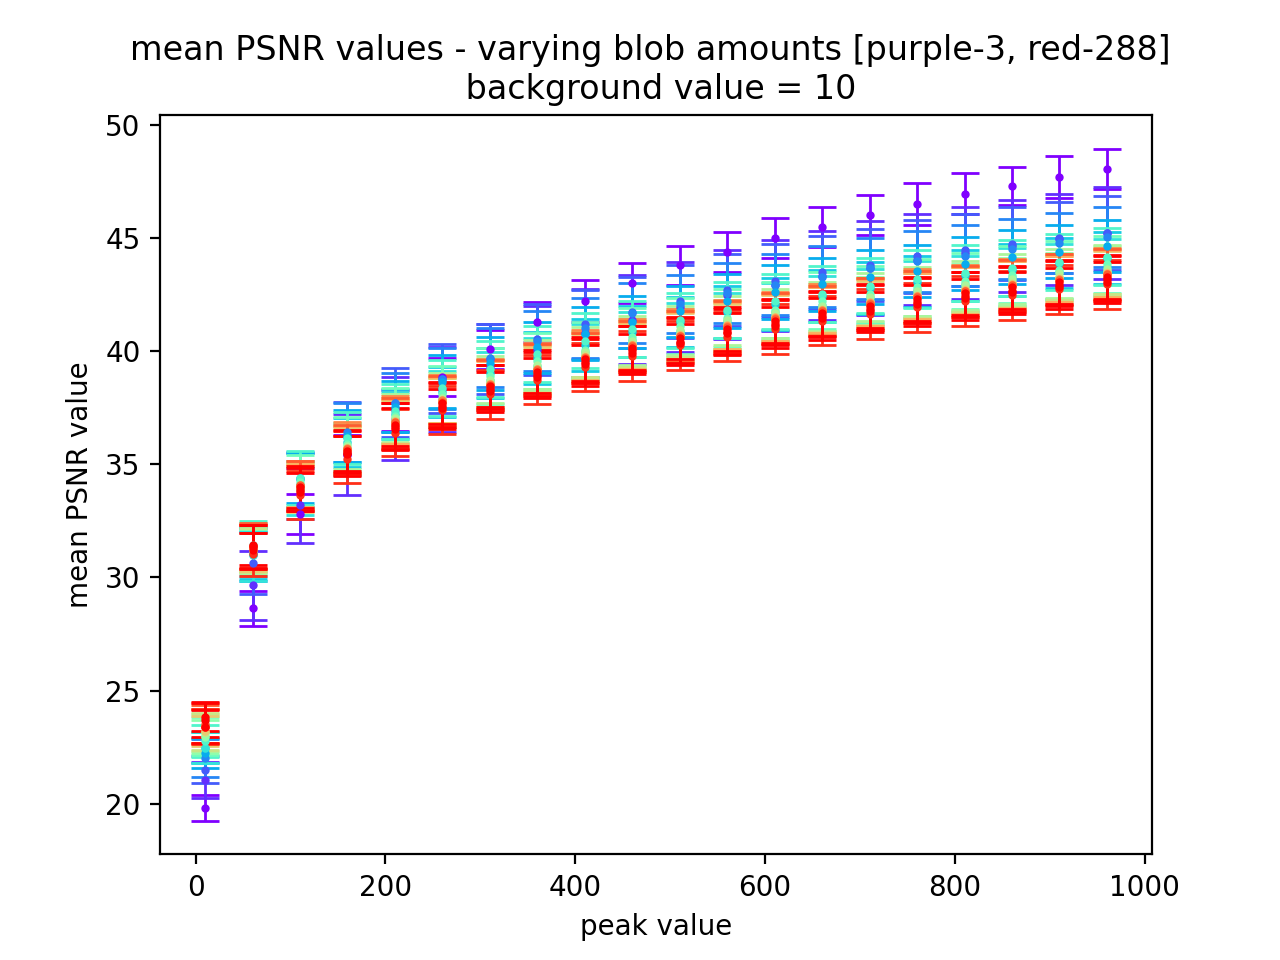

<IPython.core.display.Javascript object>


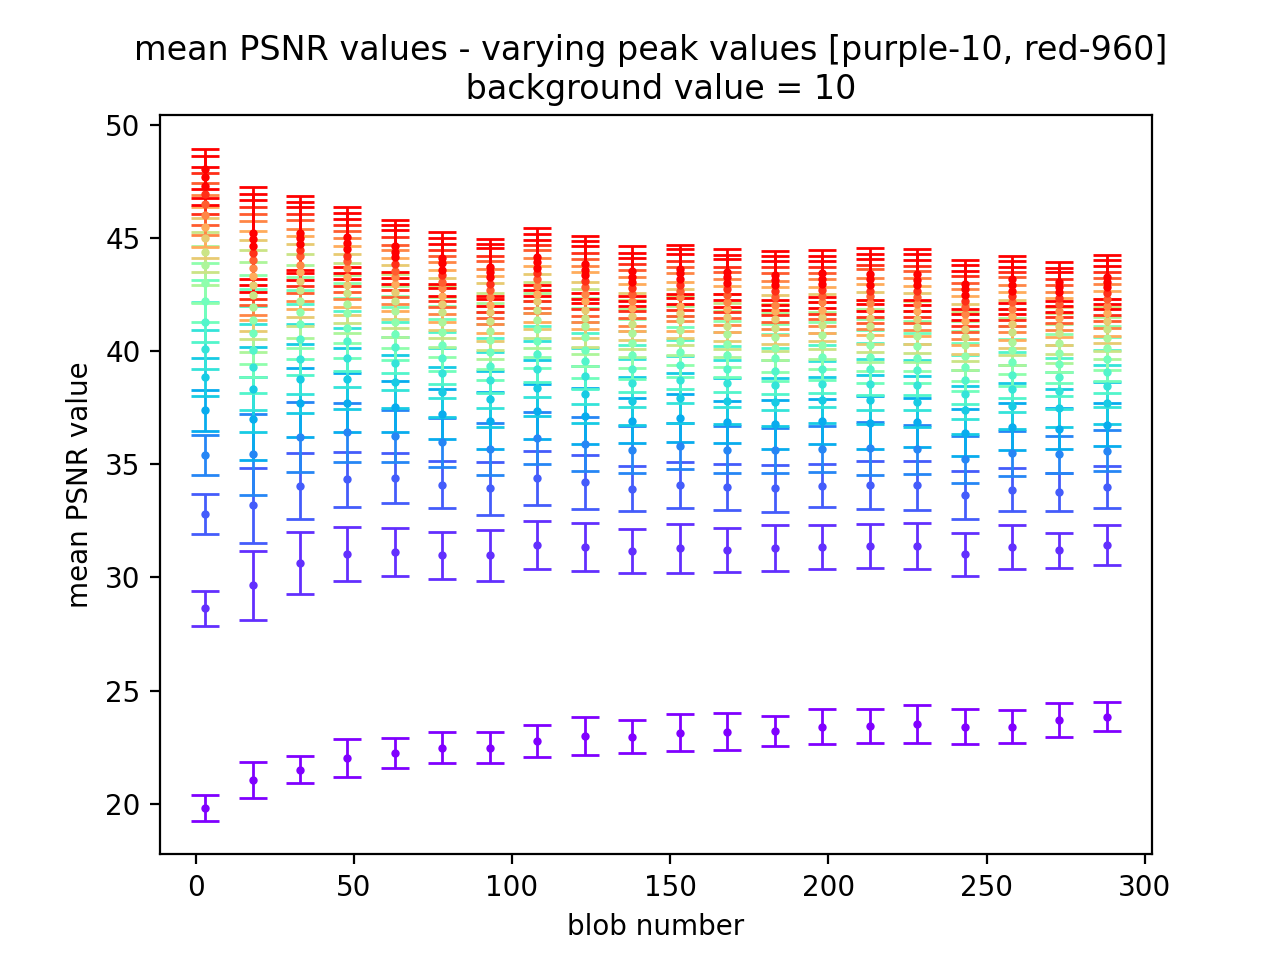

In [8]:
# -PSNR-
# 4c. Computing PSNR for each image in the data collection
# dims=[m, n, reps]
metric_output = metric_compute.PSNR_compute(un_noised_images, noised_images)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_PSNR = stats_compute.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

torch.Size([20, 20, 50])
torch.Size([20, 20, 2])


<IPython.core.display.Javascript object>


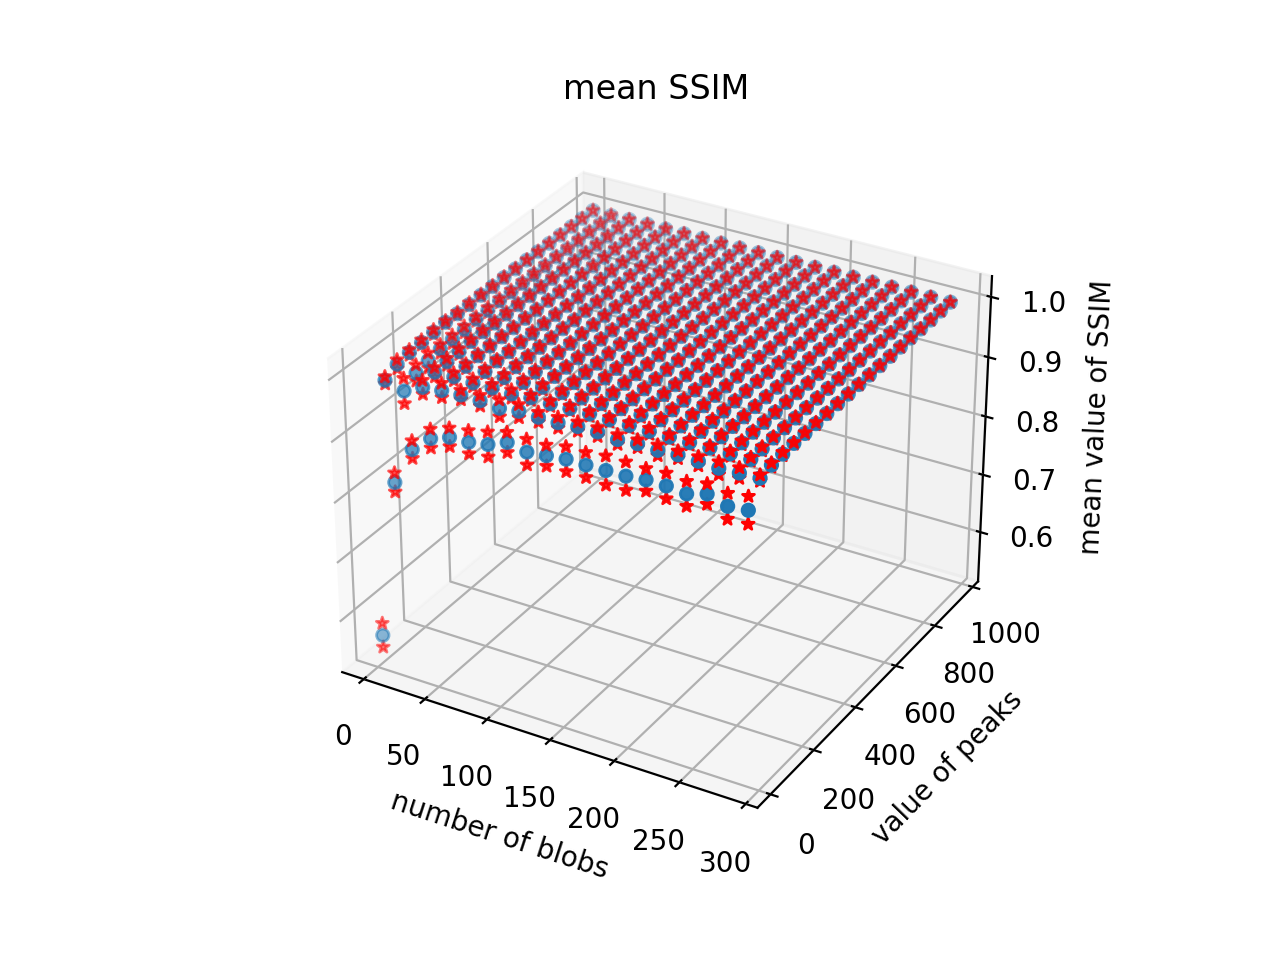

<IPython.core.display.Javascript object>


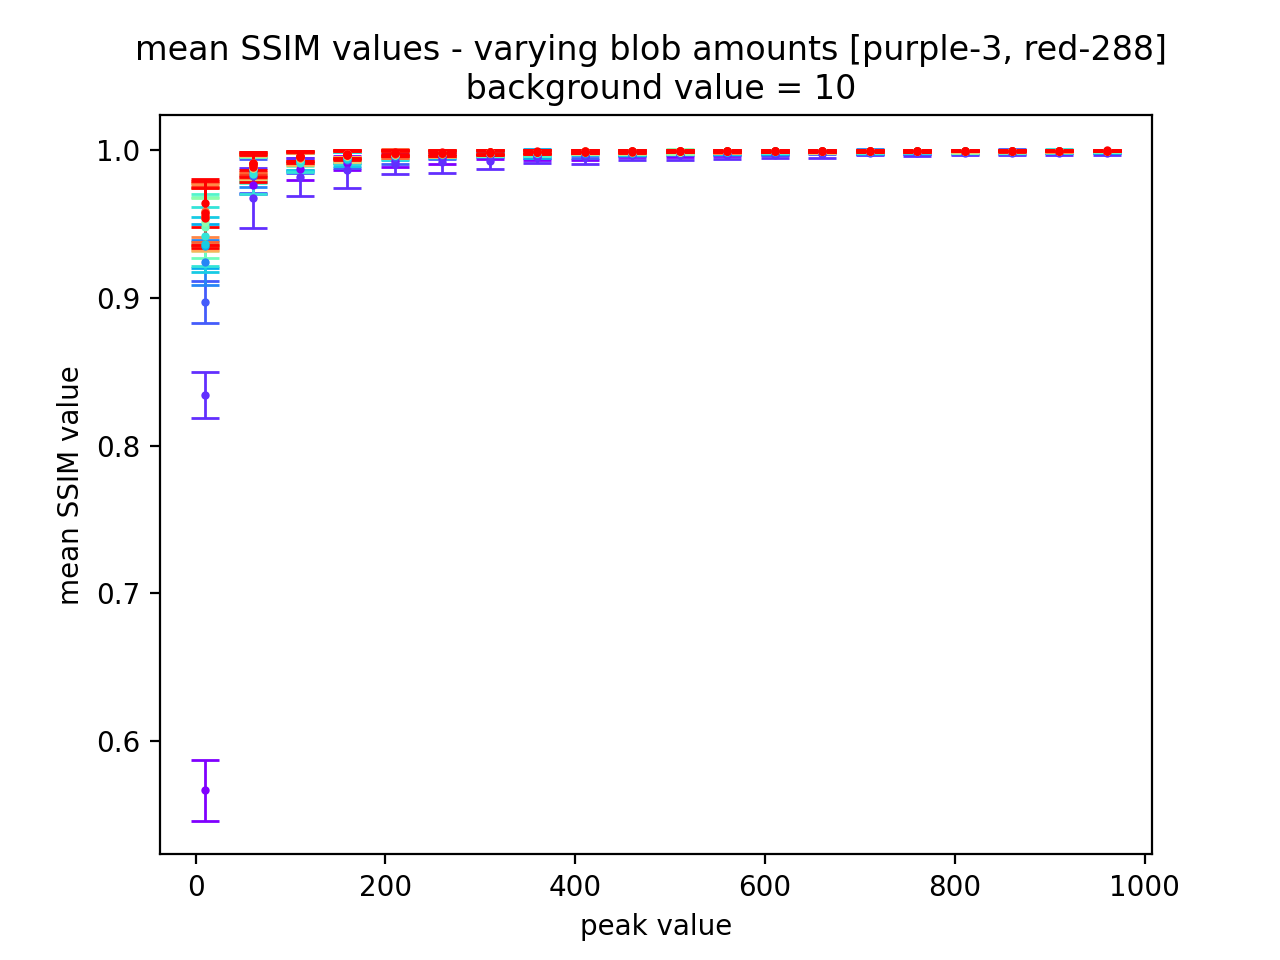

<IPython.core.display.Javascript object>


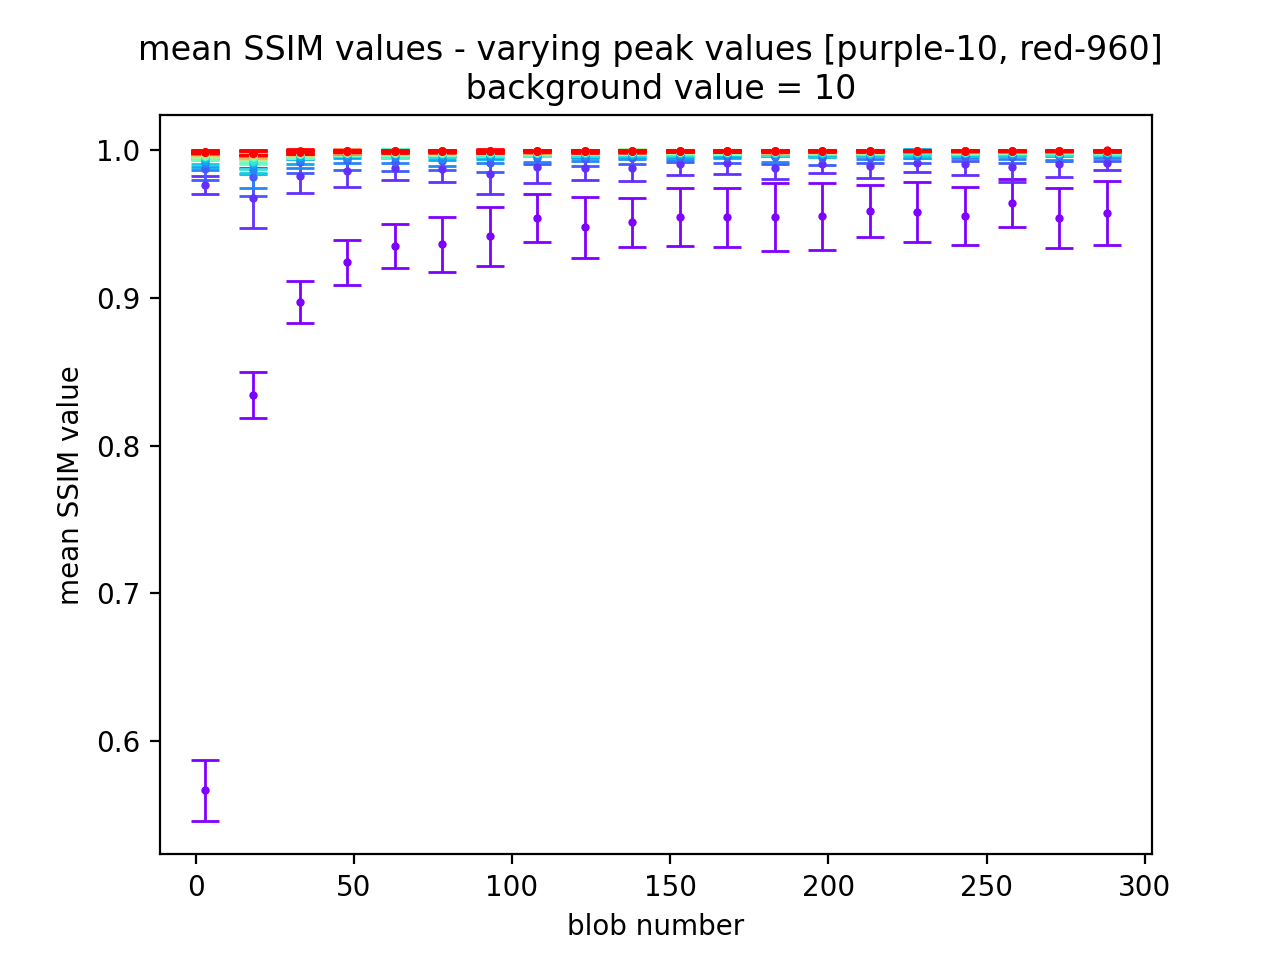

In [9]:
# -SSIM-
# 4c. Computing SSIM for each image in the data collection
# dims=[m, n, reps]
metric_output = metric_compute.SSIM_compute(un_noised_images, noised_images)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_SSIM = stats_compute.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

In [ ]:
# -MS_SSIM-
# 4c. Computing MS_SSIM for each image in the data collection
# dims=[m, n, reps]
metric_output = metric_compute.MS_SSIM_compute(un_noised_images, noised_images)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_MS_SSIM = stats_compute.set_mean_std_compute(metric_output)
#tests
print(metric_stats.shape)

In [13]:
%store metric_stats_NRMSE
%store metric_stats_RMSE
%store metric_stats_PSNR
%store metric_stats_SSIM
%store metric_stats_MS_SSIM

Stored 'metric_stats_NRMSE' (Tensor)
Stored 'metric_stats_RMSE' (Tensor)
Stored 'metric_stats_PSNR' (Tensor)
Stored 'metric_stats_SSIM' (Tensor)
Stored 'metric_stats_MS_SSIM' (Tensor)


In [ ]:
# -NRMSE-
# 6. plotting obtained stats
stats_plot.plot_stats(metric_stats_NRMSE, indices, 'NRMSE')

In [ ]:
# -RMSE-
# 6. plotting obtained stats
stats_plot.plot_stats(metric_stats_RMSE, indices, 'RMSE')

In [ ]:
# -PSNR-
# 6. plotting obtained stats
stats_plot.plot_stats(metric_stats_PSNR, indices, 'PSNR')

In [ ]:
# -SSIM-
# 6. plotting obtained stats
stats_plot.plot_stats(metric_stats_SSIM, indices, 'SSIM')

<IPython.core.display.Javascript object>


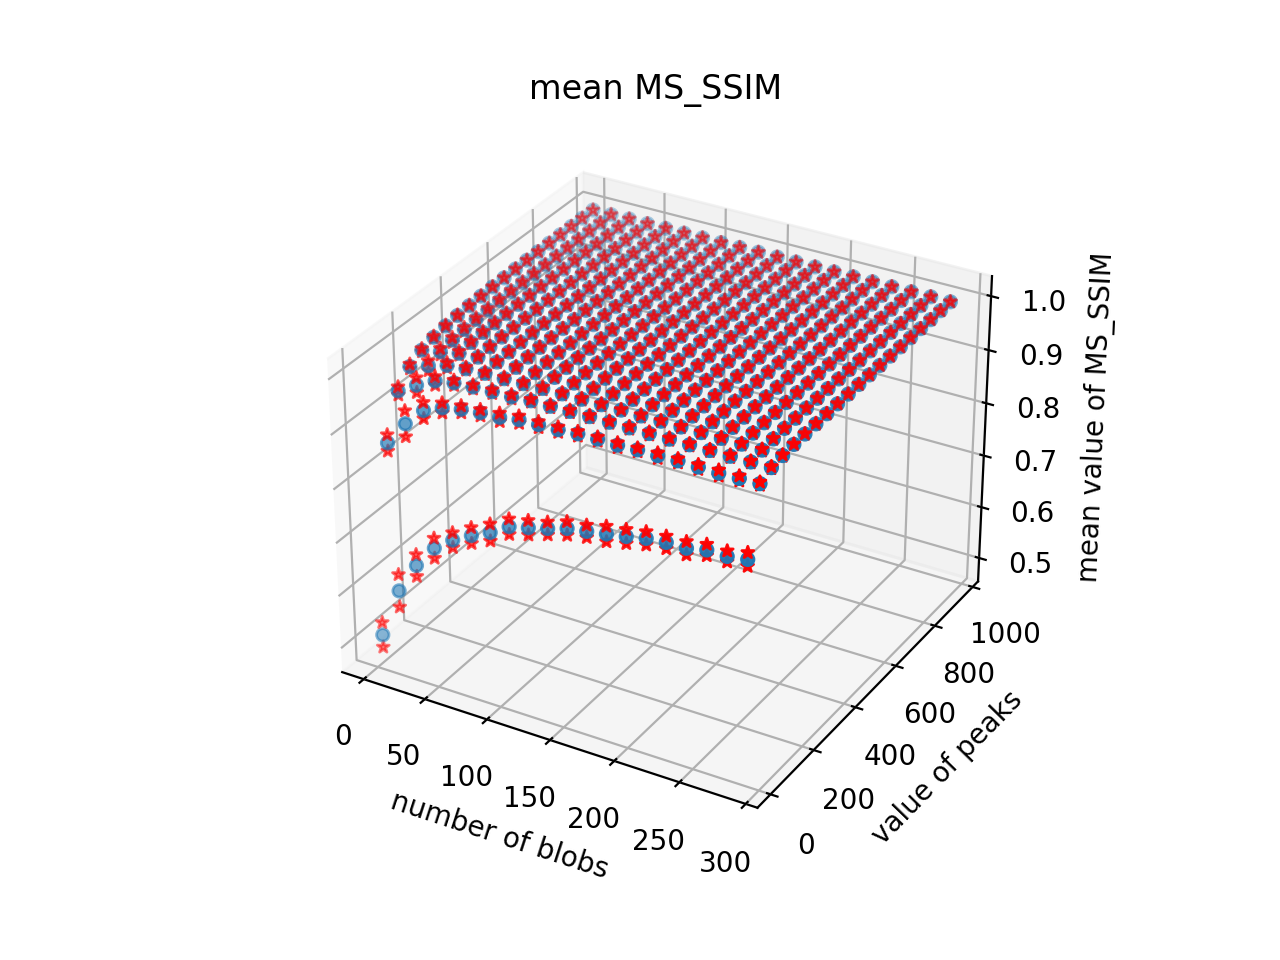

<IPython.core.display.Javascript object>


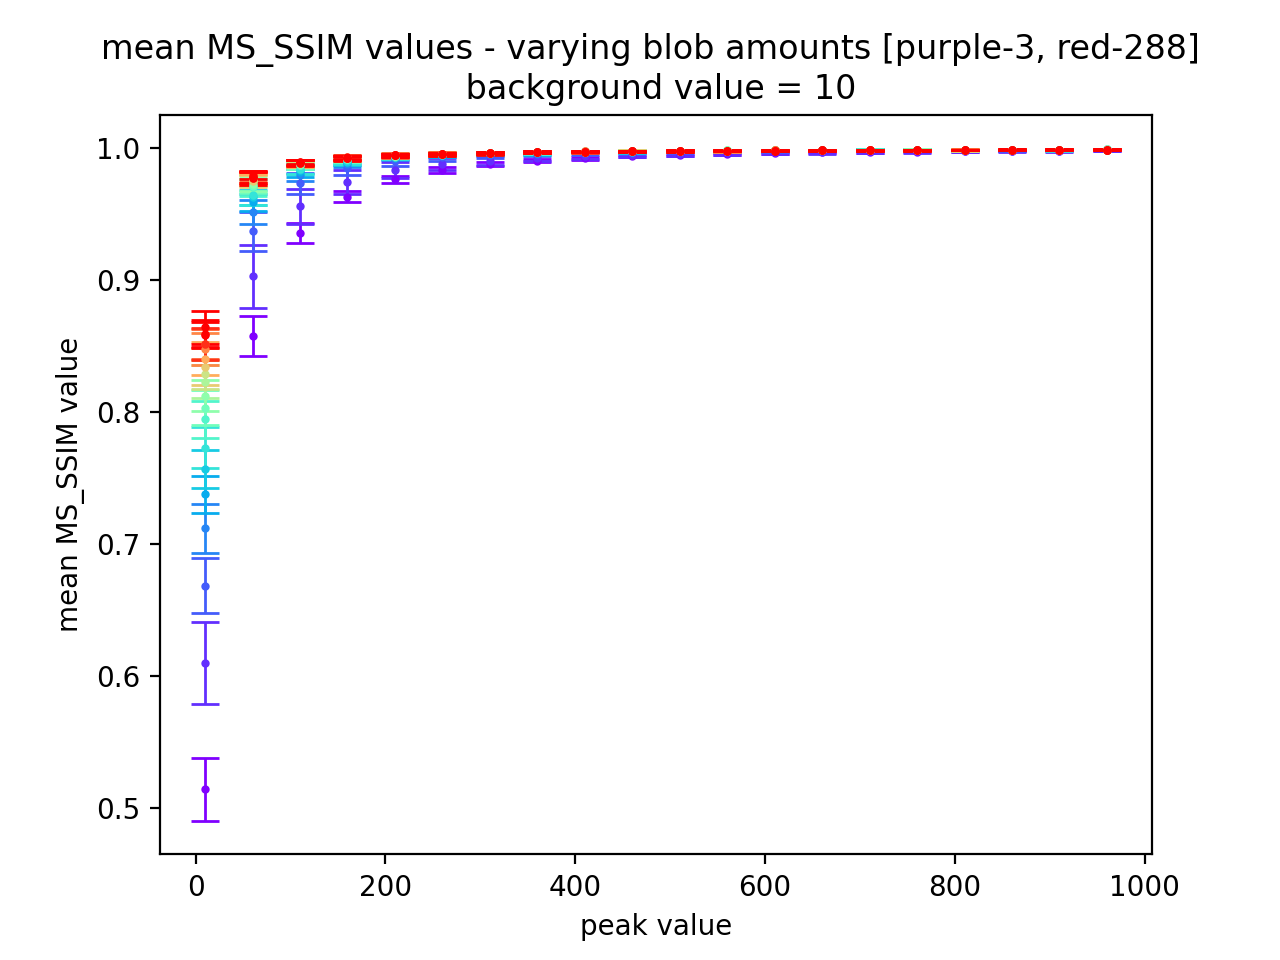

<IPython.core.display.Javascript object>


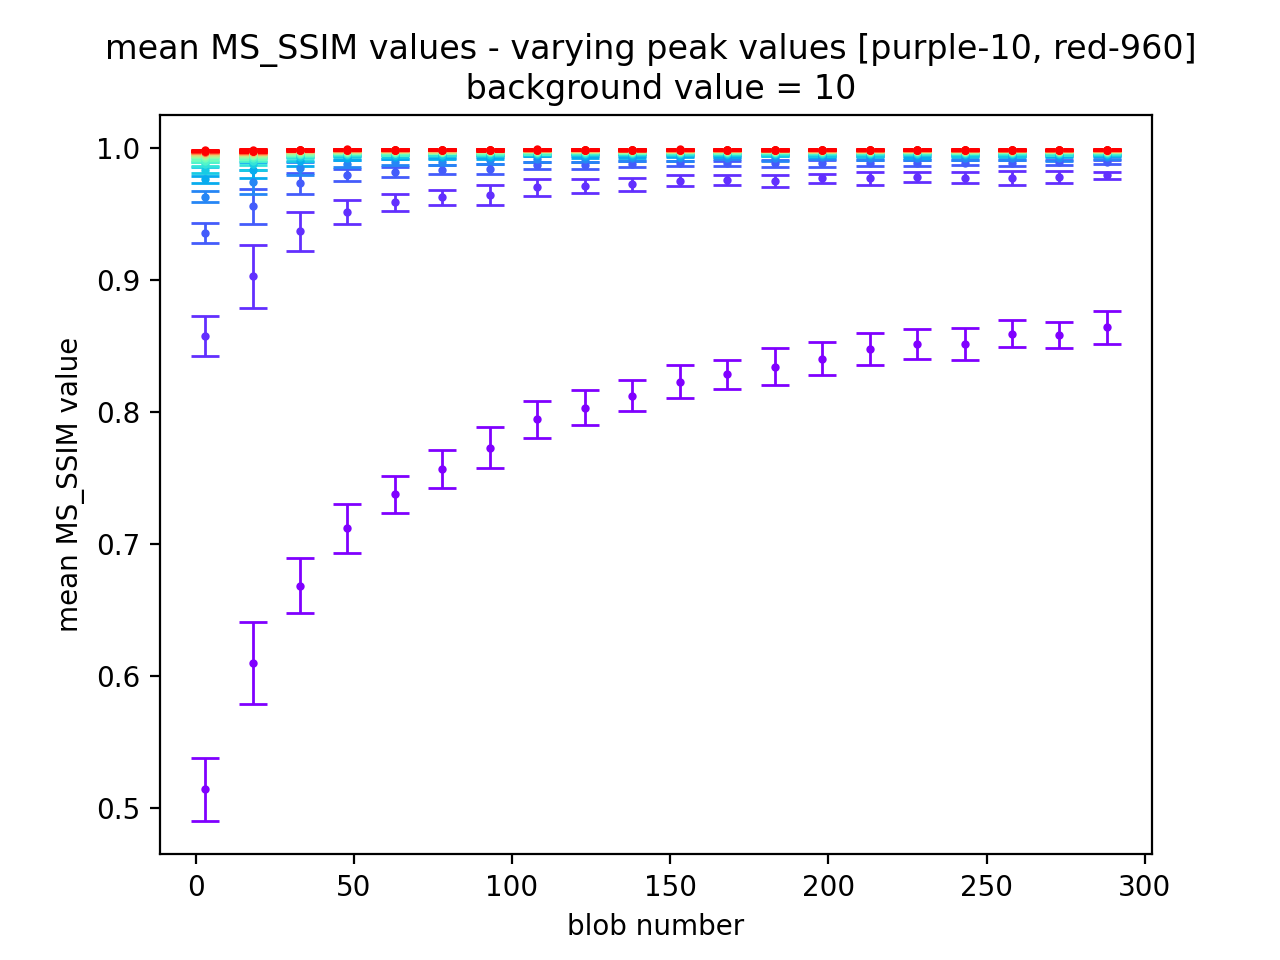

In [14]:
# -MS_SSIM-
# 6. plotting obtained stats
stats_plot.plot_stats(metric_stats_MS_SSIM, indices, 'MS_SSIM')